In [15]:
# coding: utf-8
import pandas as pd
import numpy as np
from plutus.research.backtest.backtest import BacktestTS
from plutus.utils.visualization.plot import PlotTS

np.set_printoptions(suppress=True)
pd.set_option("display.float_format", lambda x: "%.5f" % x)

backtest_ts = BacktestTS()
plot_ts = PlotTS()

In [16]:
# 获取所需要的行情数据
all_md_df = pd.read_parquet(
    "/mnt/gitee/quanthub/datahub/raw/cn/future/md/all_1d.parquet"
)
all_md_df.set_index(["trading_date", "contract"], inplace=True)

main_roll_calendar_df = pd.read_parquet(
    "/mnt/gitee/quanthub/datahub/raw/cn/future/md/main_roll_calendar.parquet"
)
main_roll_calendar_df.set_index(["trading_date", "o_m"], inplace=True)

In [17]:
md_data_daily = (all_md_df.loc[main_roll_calendar_df.index]).reset_index()
ic_md_data_daily = md_data_daily.loc[md_data_daily["symbol"] == "IC"]
ic_md_data_daily.set_index("trading_date", inplace=True)
ic_md_data_daily = ic_md_data_daily.sort_index()

In [36]:
# define a factor
def factor_ts_001():
    ic_md_data_daily["close_diff"] = (
        ic_md_data_daily["close"] - ic_md_data_daily["pre_close"]
    )
    factor = ic_md_data_daily["close_diff"].rolling(2).sum()
    return factor

In [37]:
# trans factor to signal
test_factor = factor_ts_001()
signal = np.sign(test_factor)

<AxesSubplot:xlabel='trading_date'>

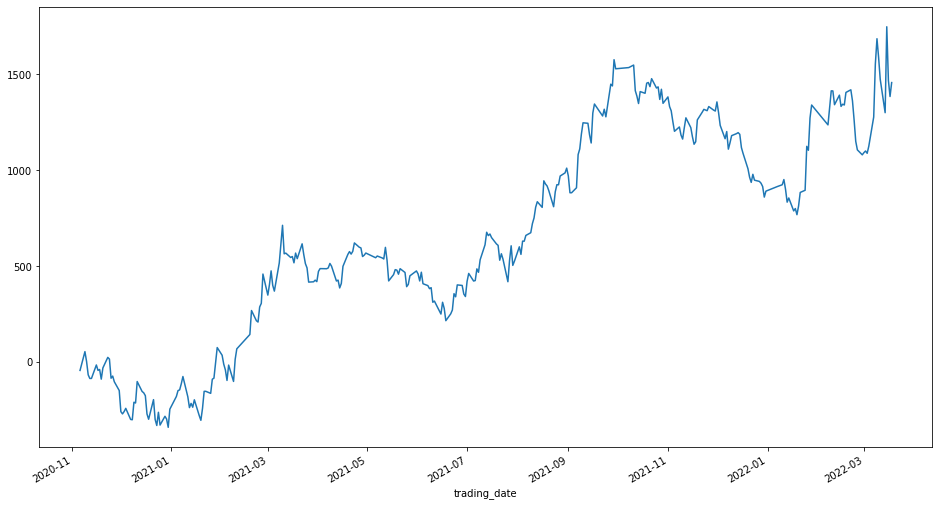

In [38]:
# backtest
trade_record = backtest_ts.backtest_ts_vector_01(
    meta_data=ic_md_data_daily, signal=signal
).dropna()
trade_record["pnl_period_cumsum"].plot(figsize=(16, 9))